In [56]:
import pandas as pd;
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

pd.set_option('display.float_format', lambda x: '%.2f' % x)
path = '../../../k6/results/run-2/ssrh/'

def convert_to_MiB(value):
    if 'GiB' in value:
        return str(int(float(value.replace('GiB', '')) * 1024))
    if 'MiB' in value:
        return value.replace('MiB', '')
    return value

def detect_outliers(df, features, contamination=0.15):
    clf = IsolationForest(contamination=contamination, random_state=42)
    outliers = clf.fit_predict(df[features])
    return outliers == 1

def plot_outliers(_df, d, loc, mask):
    loc.plot(_df['cpu_percent'], color='gray', alpha=0.5)
    loc.plot(_df['cpu_percent'][mask[d]])
    loc.plot(_df['cpu_percent'][~mask[d]], label='detected outliers', color='red')

    loc.set_title(d)
    loc.set_ylabel(f'CPU Usage %') 
    loc.set_xlabel('Docker snapshot #') 
    loc.legend(loc="upper right")

def graph_row(plot_func, datasets, height=3, width=20):
    cols = len(datasets)
    fig, axes = plt.subplots(ncols=cols, figsize=(width, height))
    plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.95, bottom=0.05)
    for x, (name, dataset) in enumerate(datasets.items()):
        plot_func(dataset, axes[x], idx=x)
        axes[x].set_title(name)
    return plt

features = ['cpu_percent','mem_usage','mem_limit','mem_percent']
services = ["monolith", "recommendations", "teasers", "cdn", "discovery"]

<module 'matplotlib.pyplot' from '/Users/auke/Library/Python/3.9/lib/python/site-packages/matplotlib/pyplot.py'>

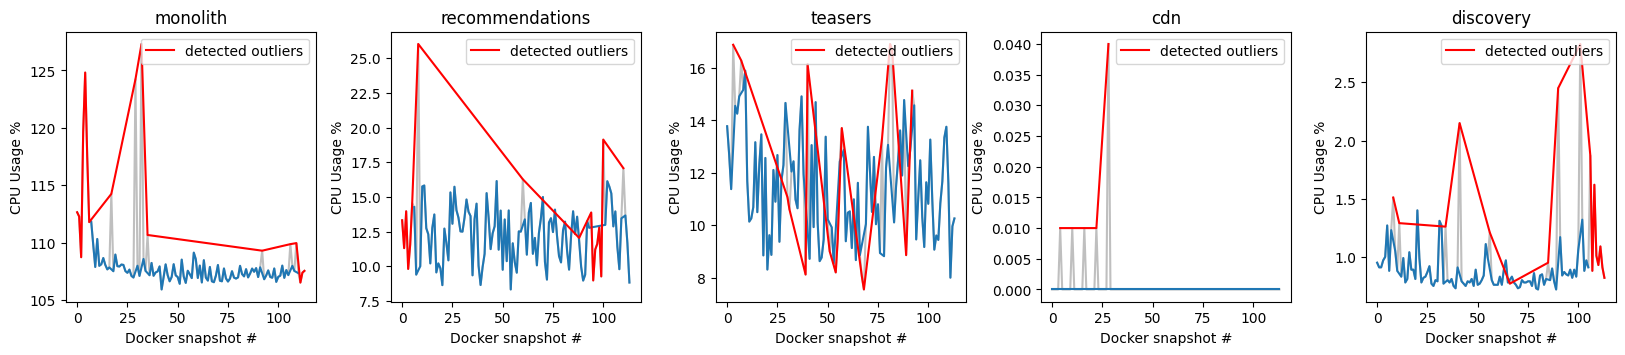

In [57]:
df = pd.read_csv(f'{path}1000/docker.csv', skiprows=1, names=['timestamp','name','cpu_percent','mem_usage','mem_limit','mem_percent'], sep=',')

df['mem_usage'] = df['mem_usage'].apply(convert_to_MiB).astype(float)
df['mem_limit'] = df['mem_limit'].apply(convert_to_MiB).astype(float)

df['cpu_percent'] = df['cpu_percent'].astype(float)
df['mem_percent'] = df['mem_percent'].astype(float)

start_time = df['timestamp'].min() + 60     # Warmup
end_time = df['timestamp'].max() - 30       # Cooldown
df_filtered = df[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)]

dirty_dfs = {service: df_filtered[df_filtered["name"] == service].reset_index(drop=True) for service in services}

masks = {}
dfs_1000 = {}

for name, _df in dirty_dfs.items():
    mask = detect_outliers(_df, features)
    masks[name] = mask
    dfs_1000[name] = _df[mask].copy()

graph_row(lambda _ds, loc, idx: plot_outliers(_ds, list(dfs_1000.keys())[idx], loc, masks), dirty_dfs)

<module 'matplotlib.pyplot' from '/Users/auke/Library/Python/3.9/lib/python/site-packages/matplotlib/pyplot.py'>

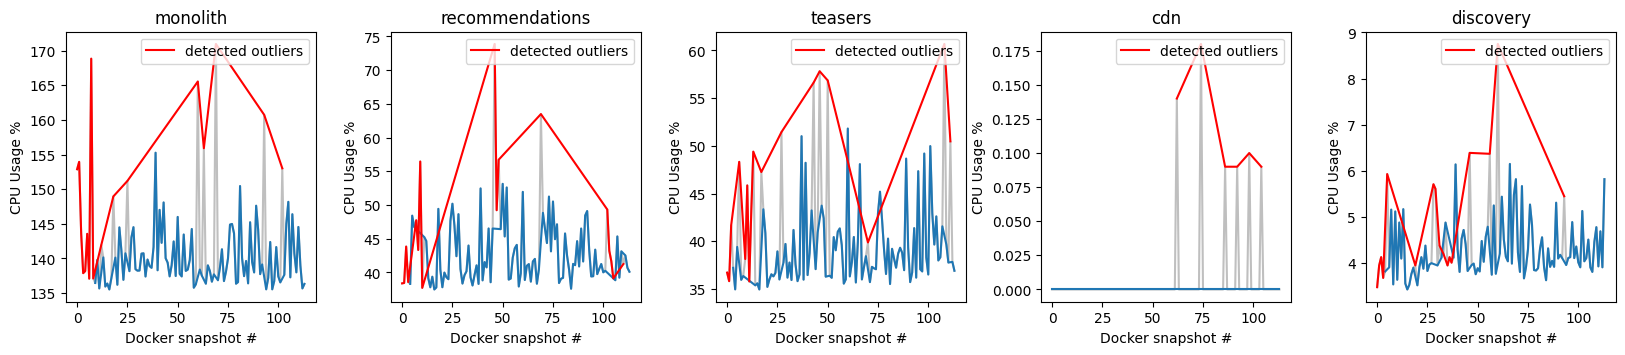

In [58]:
df = pd.read_csv(f'{path}5000/docker.csv', skiprows=1, names=['timestamp','name','cpu_percent','mem_usage','mem_limit','mem_percent'], sep=',')

df['mem_usage'] = df['mem_usage'].apply(convert_to_MiB).astype(float)
df['mem_limit'] = df['mem_limit'].apply(convert_to_MiB).astype(float)

df['cpu_percent'] = df['cpu_percent'].astype(float)
df['mem_percent'] = df['mem_percent'].astype(float)

start_time = df['timestamp'].min() + 60    # Warmup
end_time = df['timestamp'].max() - 30       # Cooldown
df_filtered = df[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)]

dirty_dfs = {service: df_filtered[df_filtered["name"] == service].reset_index(drop=True) for service in services}

masks = {}
dfs_5000 = {}

for name, _df in dirty_dfs.items():
    mask = detect_outliers(_df, features)
    masks[name] = mask
    dfs_5000[name] = _df[mask].copy()

graph_row(lambda _ds, loc, idx: plot_outliers(_ds, list(dfs_5000.keys())[idx], loc, masks), dirty_dfs)

<module 'matplotlib.pyplot' from '/Users/auke/Library/Python/3.9/lib/python/site-packages/matplotlib/pyplot.py'>

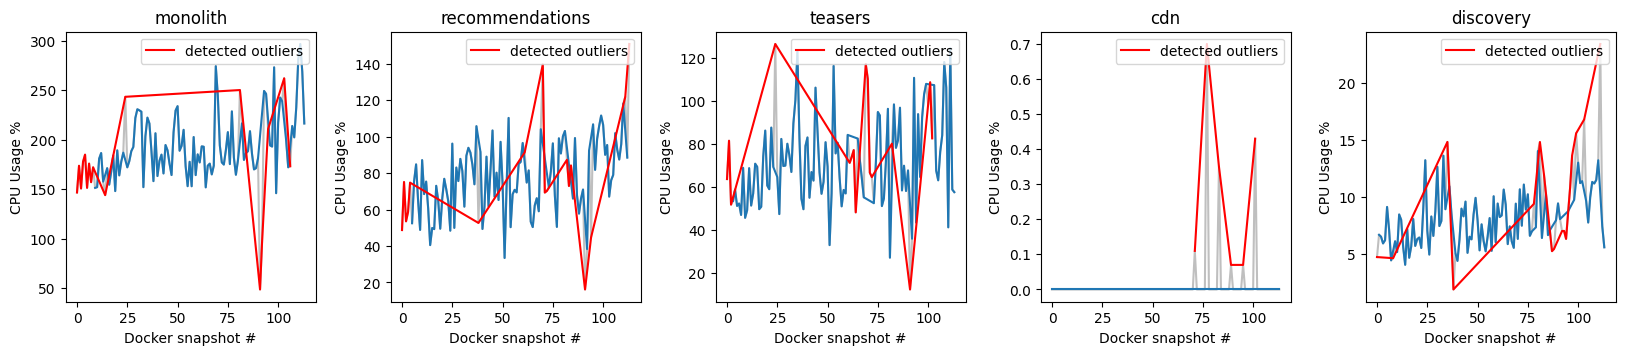

In [59]:
df = pd.read_csv(f'{path}10000/docker.csv', skiprows=1, names=['timestamp','name','cpu_percent','mem_usage','mem_limit','mem_percent'], sep=',')

df['mem_usage'] = df['mem_usage'].apply(convert_to_MiB).astype(float)
df['mem_limit'] = df['mem_limit'].apply(convert_to_MiB).astype(float)

df['cpu_percent'] = df['cpu_percent'].astype(float)
df['mem_percent'] = df['mem_percent'].astype(float)

start_time = df['timestamp'].min() + 60     # Warmup
end_time = df['timestamp'].max() - 30       # Cooldown
df_filtered = df[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)]

dirty_dfs = {service: df_filtered[df_filtered["name"] == service].reset_index(drop=True) for service in services}

masks = {}
dfs_10000 = {}

for name, _df in dirty_dfs.items():
    mask = detect_outliers(_df, features)
    masks[name] = mask
    dfs_10000[name] = _df[mask].copy()

graph_row(lambda _ds, loc, idx: plot_outliers(_ds, list(dfs_10000.keys())[idx], loc, masks), dirty_dfs)

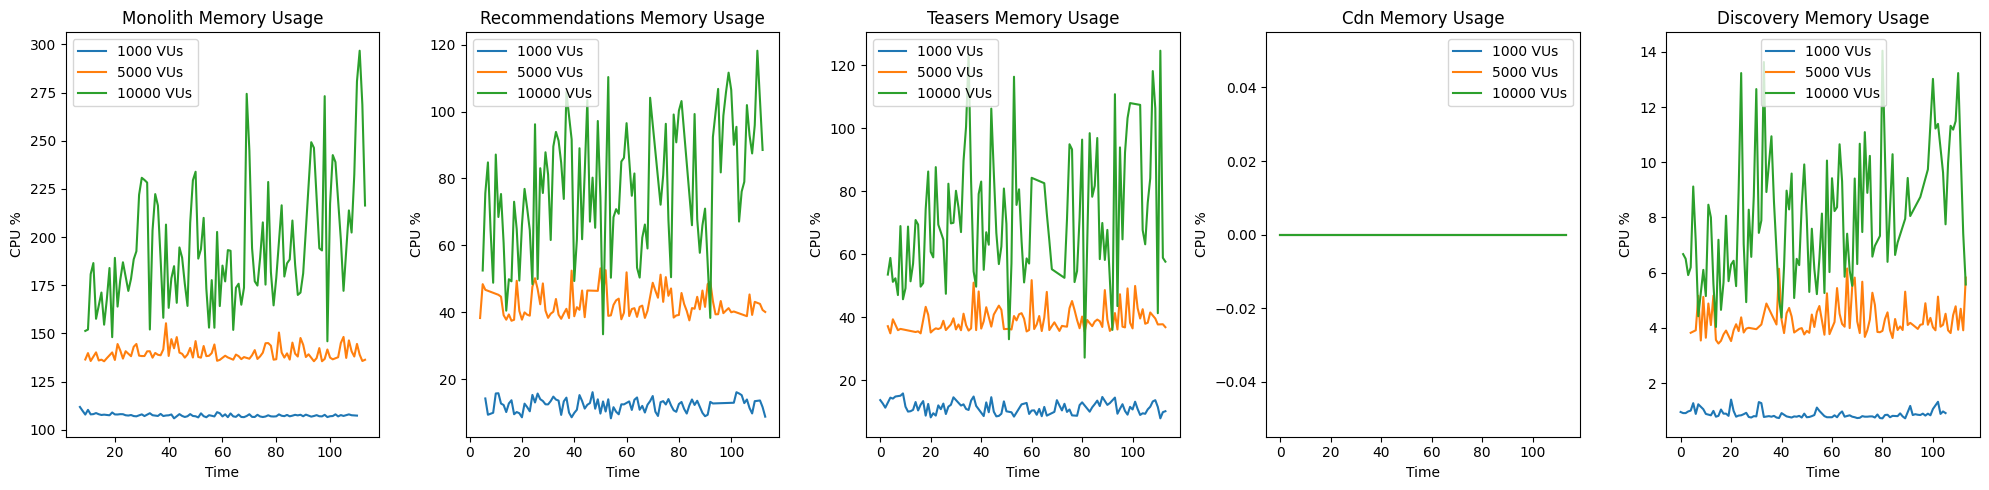

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=len(services), figsize=(20, 5))

# Memory usage line graph
for i, s in enumerate(services):
    axes[i].plot(dfs_1000[s]['cpu_percent'], label=f'1000 VUs')
    axes[i].plot(dfs_5000[s]['cpu_percent'], label=f'5000 VUs')
    axes[i].plot(dfs_10000[s]['cpu_percent'], label=f'10000 VUs')

    axes[i].set_title(f'{s.capitalize()} Memory Usage')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('CPU %')
    axes[i].legend()

plt.tight_layout()
plt.show()


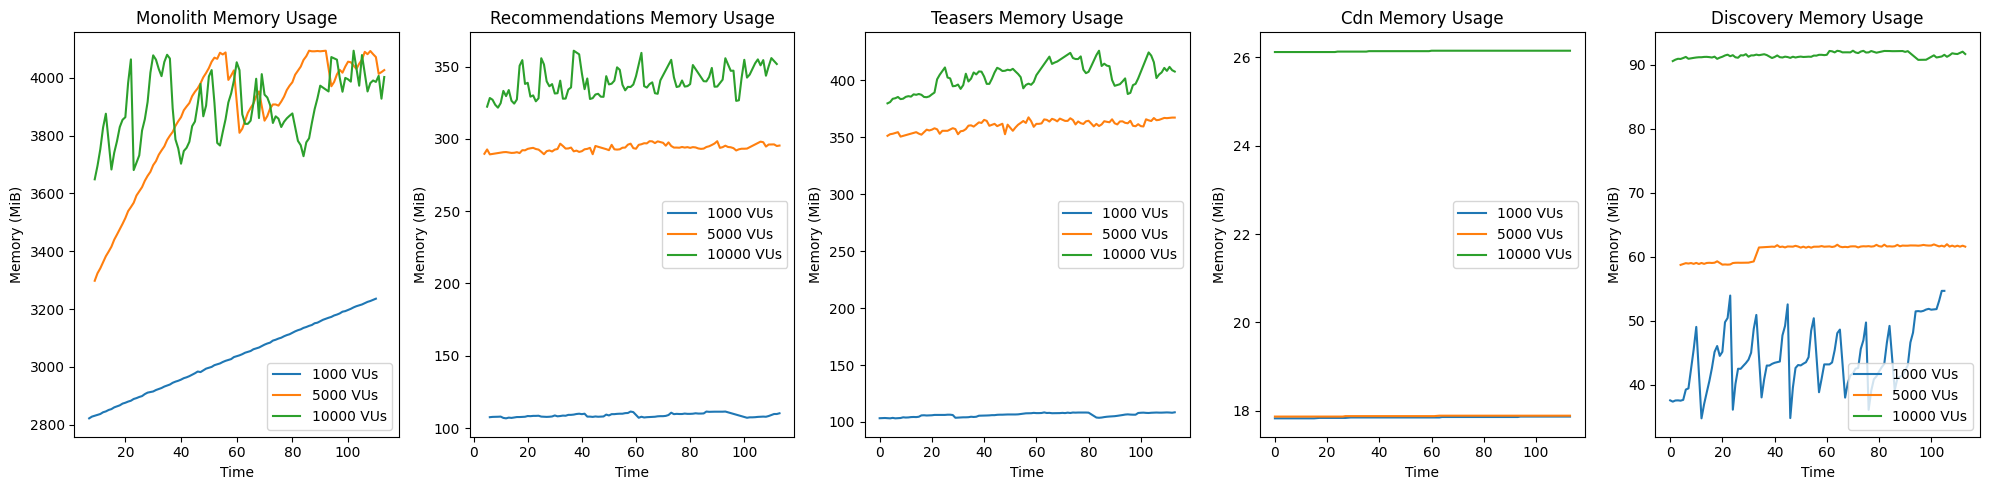

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=len(services), figsize=(20, 5))

# Memory usage line graph
for i, s in enumerate(services):
    axes[i].plot(dfs_1000[s]['mem_usage'], label=f'1000 VUs')
    axes[i].plot(dfs_5000[s]['mem_usage'], label=f'5000 VUs')
    axes[i].plot(dfs_10000[s]['mem_usage'], label=f'10000 VUs')

    axes[i].set_title(f'{s.capitalize()} Memory Usage')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Memory (MiB)')
    axes[i].legend()

plt.tight_layout()
plt.show()


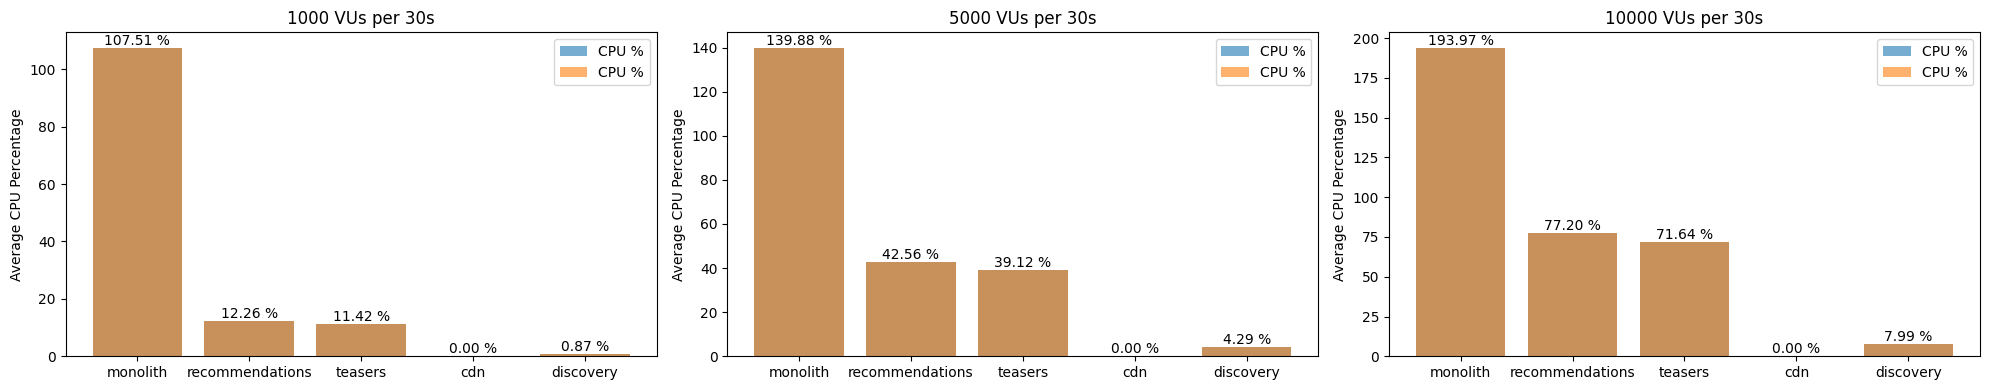

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

dfs_keys = ['1000', '5000', '10000']
for i, _df in enumerate([dfs_1000, dfs_5000, dfs_10000]):
    cpu_means = [_df[s]['cpu_percent'].mean() for s in services]
    bars_cpu = axes[i].bar(services, cpu_means, label='CPU %', alpha=0.6)

    axes[i].bar(services, cpu_means, label='CPU %', alpha=0.6)
    axes[i].set_title(f'{dfs_keys[i]} VUs per 30s')
    axes[i].set_ylabel('Average CPU Percentage')
    axes[i].legend()

    for bar in bars_cpu:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f} %', ha='center', va='bottom')

plt.tight_layout()
plt.show()